In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pmdarima.arima import auto_arima, ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings

In [15]:
df = pd.read_csv("ParisIndex-2016-2023.csv",index_col=0)
df

,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,...,2023-09-18,2023-09-19,2023-09-20,2023-09-21,2023-09-22,2023-09-25,2023-09-26,2023-09-27,2023-09-28,2023-09-29
Close,4522.450195,4537.629883,4480.470215,4403.580078,4333.759766,4312.740234,4378.75,4391.939941,4312.890137,4210.160156,...,7276.140137,7282.120117,7330.790039,7213.899902,7184.819824,7123.879883,7074.02002,7071.790039,7116.240234,7135.060059


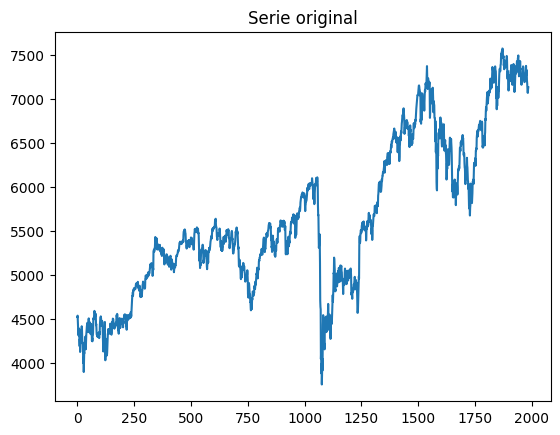

In [3]:
plt.plot(df.values[0])
plt.title("Serie original")
plt.show()

In [4]:
df_train=df.iloc[0,:1589]
df_test=df.iloc[0,1589:]
df_train_log=np.log(df.iloc[0,:1589])
df_test_log=np.log(df.iloc[0,1589:])

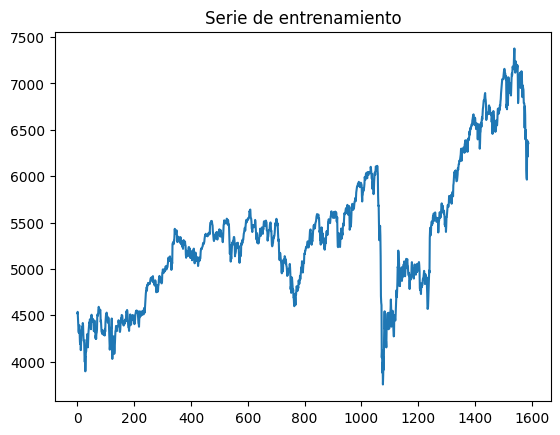

In [5]:
plt.plot(df_train.values)
plt.title("Serie de entrenamiento")
plt.show()

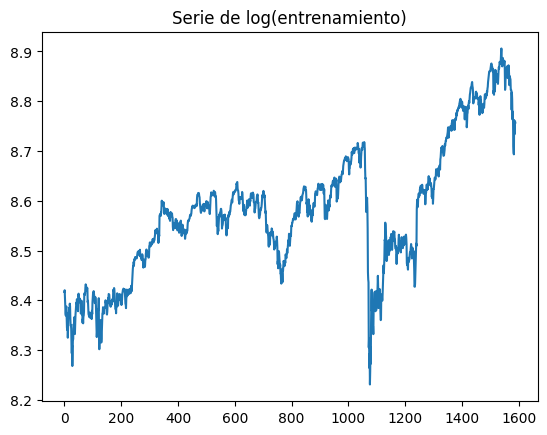

In [6]:
plt.plot(df_train_log.values)
plt.title("Serie de log(entrenamiento)")
plt.show()

In [7]:
df_train_diff = df_train.diff().dropna()
df_train_diff_log = df_train_log.diff().dropna()

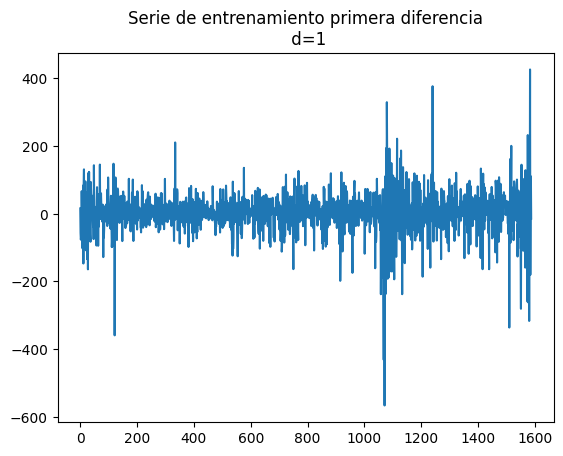

Adfuller p-value = 1.0918185383244846e-15


In [8]:
plt.plot(df_train_diff.values)
plt.title("Serie de entrenamiento primera diferencia\n d=1")
plt.show()
print(f"Adfuller p-value = {adfuller(df_train_diff.dropna())[1]}")

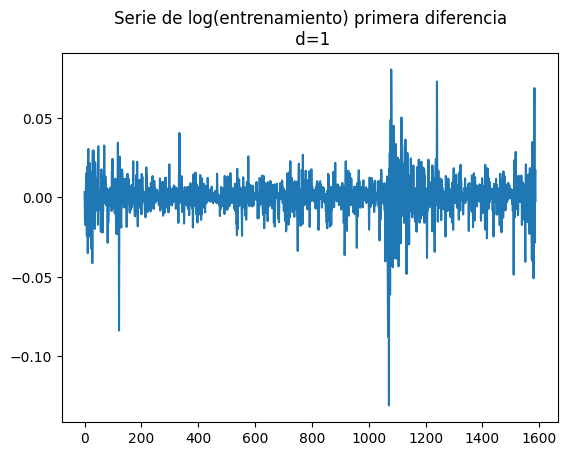

Adfuller p-value = 1.0918185383244846e-15


In [9]:
plt.plot(df_train_diff_log.values)
plt.title("Serie de log(entrenamiento) primera diferencia\n d=1")
plt.show()
print(f"Adfuller p-value = {adfuller(df_train_diff.dropna())[1]}")

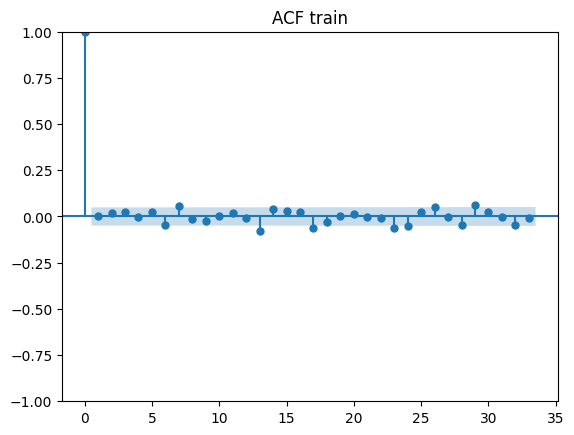

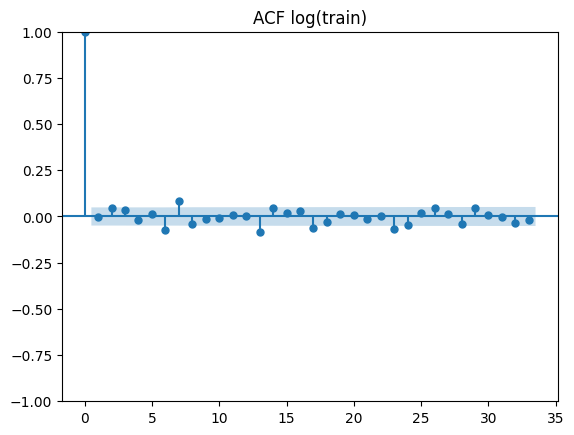

In [10]:
plot_acf(df_train_diff.dropna())
plt.title("ACF train")
plt.show()

plot_acf(df_train_diff_log.dropna())
plt.title("ACF log(train)")
plt.show()

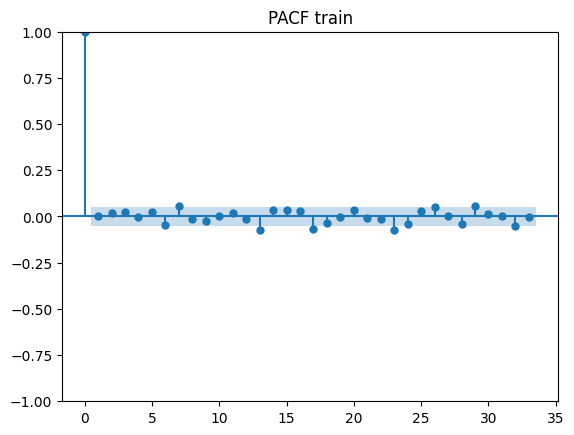

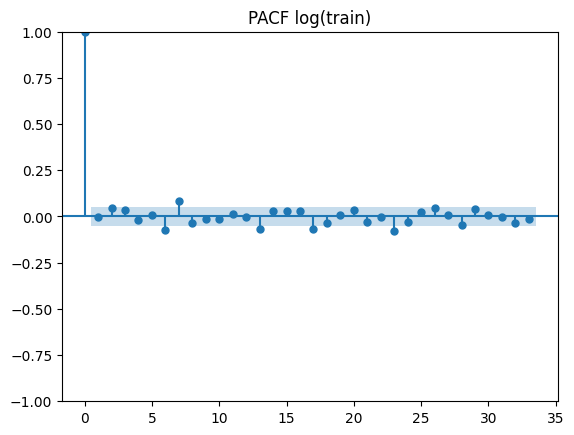

In [11]:
plot_pacf(df_train_diff.dropna())
plt.title("PACF train")
plt.show()

plot_pacf(df_train_diff_log.dropna())
plt.title("PACF log(train)")
plt.show()

## Modelos

In [14]:
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
model_manual = ARIMA(order=(1,1,0))
model_manual.fit(y = df_train)
model_manual.summary()

/home/agustin/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/agustin/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1589
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -8818.413
Date:                Wed, 25 Oct 2023   AIC                          17642.826
Time:                        19:36:36   BIC                          17658.936
Sample:                             0   HQIC                         17648.810
                               - 1589                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1449      1.638      0.699      0.485      -2.065       4.355
ar.L1          0.0003      0.017      0.019      0.985      -0.032       0.033
sigma2      3901.1786     56.829     68.648      0.000    3789.796    4012.561
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7971.36
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.51   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
forecast_manual = model_manual.predict(df_test.shape[0])
forecast_manual.head(5)

/home/agustin/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/agustin/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1589    6356.140229
1590    6357.285441
1591    6358.430655
1592    6359.575869
1593    6360.721083
dtype: float64

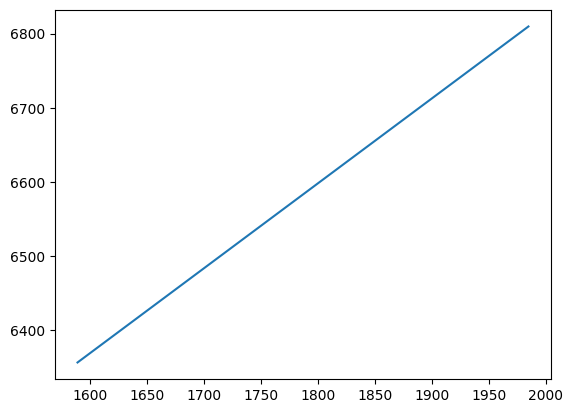

In [23]:
plt.plot(forecast_manual)
plt.show()

In [27]:
model_auto = auto_arima(df_train)
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1589
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8818.684
Date:                Tue, 24 Oct 2023   AIC                          17639.368
Time:                        21:40:08   BIC                          17644.738
Sample:                             0   HQIC                         17641.363
                               - 1589                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3900.1798     54.826     71.137      0.000    3792.723    4007.637
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7972.74
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.51   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
forecast_auto = model_auto.predict(df_test.shape[0])
forecast_auto.head(5)

/home/agustin/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/agustin/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1589    6355.0
1590    6355.0
1591    6355.0
1592    6355.0
1593    6355.0
dtype: float64

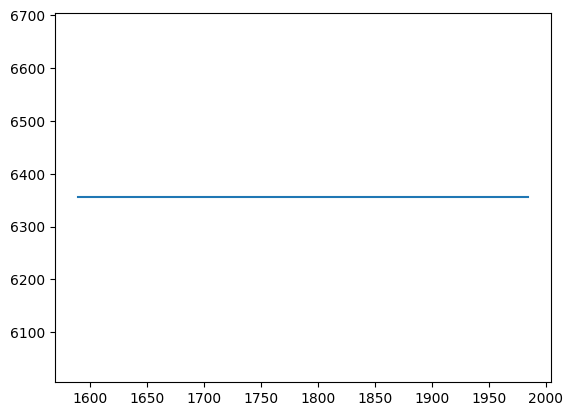

In [30]:
plt.plot(forecast_auto)
plt.show()